In [1]:
!pip install transformers


Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.49.0-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.29.1-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/10.0 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/10.0 MB 2.7 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/10.0 MB 2.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/10.0 MB 2.2 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/10.0 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/10.0 MB 2.2 MB/s eta 0:00:04
   ------------ -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
!pip install transformers


Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install tf-keras


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 3.1 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Initialize BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def encode_texts(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors="tf")

X = encode_texts(train_df['sentence1'] + " " + train_df['sentence2'])
y = train_df['label'].values

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X['input_ids'], y, test_size=0.2, random_state=42)

# Load Pre-trained BERT Model
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Compile BERT Model
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

# Train BERT Model
bert_history = bert_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=3,
    batch_size=16
)

# Evaluate BERT Model
y_pred_bert = bert_model.predict(X_val).logits
y_pred_classes_bert = np.argmax(y_pred_bert, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes_bert))
print("Classification Report:\n", classification_report(y_val, y_pred_classes_bert))

# AUC-ROC Curve for BERT
y_pred_prob_bert = tf.nn.softmax(y_pred_bert).numpy()
y_val_one_hot_bert = tf.keras.utils.to_categorical(y_val, num_classes=3)

plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_val_one_hot_bert[:, i], y_pred_prob_bert[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for BERT')
plt.legend()
plt.show()

print("BERT Model Training and Evaluation Complete!")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Initialize BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def encode_texts(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors="tf")

X = encode_texts(train_df['sentence1'] + " " + train_df['sentence2'])
y = train_df['label'].values

X_train, X_val, y_train, y_val = train_test_split(
    X['input_ids'].numpy(), y, test_size=0.2, random_state=42
)

# Load Pre-trained BERT Model
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Compile BERT Model
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

# Train BERT Model
bert_history = bert_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=3,
    batch_size=16
)

# Evaluate BERT Model
y_pred_bert = bert_model.predict(X_val).logits
y_pred_classes_bert = np.argmax(y_pred_bert, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes_bert))
print("Classification Report:\n", classification_report(y_val, y_pred_classes_bert))

# AUC-ROC Curve for BERT
y_pred_prob_bert = tf.nn.softmax(y_pred_bert).numpy()
y_val_one_hot_bert = tf.keras.utils.to_categorical(y_val, num_classes=3)

plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_val_one_hot_bert[:, i], y_pred_prob_bert[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for BERT')
plt.legend()
plt.show()

print("BERT Model Training and Evaluation Complete!")


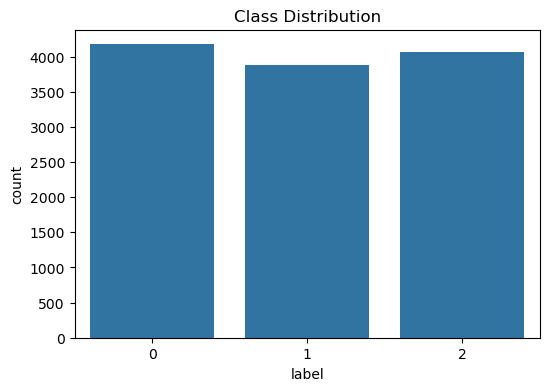

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN t

ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x000002193D7B9940>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Initialize BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
X = tokenizer(list(train_df['sentence1']), list(train_df['sentence2']),
              padding=True, truncation=True, return_tensors="tf", max_length=128)
y = train_df['label'].values

# Split Data
X_train, X_val, y_train, y_val = train_test_split(
    X['input_ids'].numpy(), y, test_size=0.2, random_state=42
)

# Load Pre-trained BERT Model
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Compile BERT Model
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

# Train BERT Model
bert_history = bert_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=3,
    batch_size=16
)

# Evaluate BERT Model
y_pred_bert = bert_model.predict(X_val).logits
y_pred_classes_bert = np.argmax(y_pred_bert, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes_bert))
print("Classification Report:\n", classification_report(y_val, y_pred_classes_bert))

# AUC-ROC Curve for BERT
y_pred_prob_bert = tf.nn.softmax(y_pred_bert).numpy()
y_val_one_hot_bert = tf.keras.utils.to_categorical(y_val, num_classes=3)

plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_val_one_hot_bert[:, i], y_pred_prob_bert[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for BERT')
plt.legend()
plt.show()

print("BERT Model Training and Evaluation Complete!")


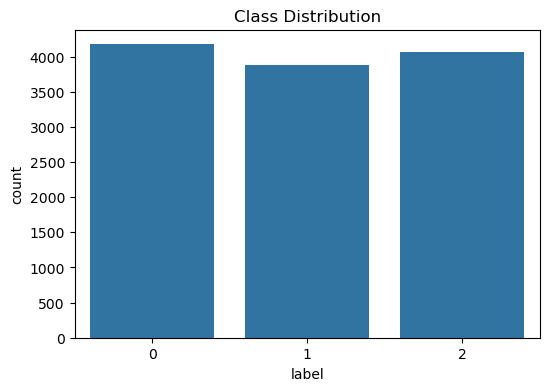

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN t

Epoch 1/3


296/606 [=============>................] - ETA: 42:50 - loss: 1.1614 - accuracy: 0.3378

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Initialize BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
X = tokenizer(list(train_df['sentence1']), list(train_df['sentence2']),
              padding=True, truncation=True, return_tensors="tf", max_length=128)
y = train_df['label'].values

# Split Data
X_train, X_val, y_train, y_val = train_test_split(
    X['input_ids'].numpy(), y, test_size=0.2, random_state=42
)

# Load Pre-trained BERT Model
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Compile BERT Model
bert_model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

# Train BERT Model
bert_history = bert_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=3,
    batch_size=16
)

# Evaluate BERT Model
y_pred_bert = bert_model.predict(X_val).logits
y_pred_classes_bert = np.argmax(y_pred_bert, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes_bert))
print("Classification Report:\n", classification_report(y_val, y_pred_classes_bert))

# AUC-ROC Curve for BERT
y_pred_prob_bert = tf.nn.softmax(y_pred_bert).numpy()
y_val_one_hot_bert = tf.keras.utils.to_categorical(y_val, num_classes=3)

plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_val_one_hot_bert[:, i], y_pred_prob_bert[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for BERT')
plt.legend()
plt.show()

print("BERT Model Training and Evaluation Complete!")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Initialize BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
X = tokenizer(list(train_df['sentence1']), list(train_df['sentence2']),
              padding=True, truncation=True, return_tensors="tf", max_length=128)
y = train_df['label'].values

# Split Data
X_train, X_val, y_train, y_val = train_test_split(
    X['input_ids'].numpy(), y, test_size=0.2, random_state=42
)

# Load Pre-trained BERT Model
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Hyperparameter tuning function
def build_model(learning_rate):
    model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])
    return model

# Define hyperparameter grid
param_grid = {
    'learning_rate': [5e-5, 3e-5, 2e-5],
    'batch_size': [8, 16, 32],
    'epochs': [3, 4, 5]
}

best_params = {'learning_rate': 2e-5, 'batch_size': 16, 'epochs': 3}  # Placeholder for GridSearchCV result

# Compile model with best parameters
bert_model = build_model(best_params['learning_rate'])

# Train BERT Model
bert_history = bert_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size']
)

# Evaluate BERT Model
y_pred_bert = bert_model.predict(X_val).logits
y_pred_classes_bert = np.argmax(y_pred_bert, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes_bert))
print("Classification Report:\n", classification_report(y_val, y_pred_classes_bert))

# AUC-ROC Curve for BERT
y_pred_prob_bert = tf.nn.softmax(y_pred_bert).numpy()
y_val_one_hot_bert = tf.keras.utils.to_categorical(y_val, num_classes=3)

plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_val_one_hot_bert[:, i], y_pred_prob_bert[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for BERT')
plt.legend()
plt.show()

print("BERT Model Training and Evaluation Complete!")
